In [1]:
import numpy as np
import pandas as pd
import random
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
## FOR BASE TPG
def runAgent(args):
    agent = args[0]
    envName = args[1]
    scoreList = args[2]
    numEpisodes = args[3] # number of times to repeat game
    numFrames = args[4] 
    gen = args[5]
    env = args[6]
    
    # skip if task already done by agent
    if agent.taskDone(envName):
        print('Agent #' + str(agent.agentNum) + ' can skip.')
        scoreList.append((agent.team.id, agent.team.outcomes))
        return

    valActs = 4
    
    # create environment object from above
    scoreTotal = 0
    for ep in range(numEpisodes):
        state = env.reset()
        scoreEp = 0
        states = []

        if numEpisodes > 1:
            for i in range(numFrames): # frame loop           
                # action selection
                act = agent.act(state)
                
                state, reward, isDone = env.step(act)
                scoreEp += reward
                
                if isDone:
                    print('win!')
                    print(states)
                    break
                    
            print('Agent #' + str(agent.agentNum) + 
              ' | Ep #' + str(ep) + ' | Score: ' + str(scoreEp))
            
        scoreTotal += scoreEp
    scoreTotal /= numEpisodes
    env.close()
    agent.reward(scoreTotal, envName)
    scoreList.append((agent.team.id, agent.team.outcomes))
    if isDone:
        return
#     else:
#         return 0

In [3]:
class Figure9:
    def __init__ (self, rows, cols, win_state, start_state):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = 20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        
    def reset (self):
        self.current_state = self.start_state
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            
            if (next == (1, 6)) or (next == (2, 6)) or (next == (3, 6)) or (next == (5, 2)) or (next == (5, 3)) or (next == (5, 4)) or (next == (5, 5)) or (next == (4, 9)) or (next == (4, 8)) or (next == (5, 8)) or (next == (6, 8)) or (next == (6, 5)) or (next == (7, 5)) or (next == (8, 5)) or (next == (9, 5)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += 0.1
                #reward -= 0.01
            else:
                reward -= 0.01
                #reward -= 1
                #reward = reward
        else:
            reward -= 0.01
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward -= 0.01
            #reward -= 1
            #reward = reward
        
        if self.check_win():
            reward += 100
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((10, 10))
        # add barrier
        current_map[(1, 6)] = 5
        current_map[(2, 6)] = 5
        current_map[(3, 6)] = 5
        current_map[(4, 9)] = 5
        current_map[(4, 8)] = 5
        current_map[(5, 8)] = 5
        current_map[(6, 8)] = 5
        current_map[(5, 2)] = 5
        current_map[(5, 3)] = 5
        current_map[(5, 4)] = 5
        current_map[(5, 5)] = 5
        current_map[(6, 5)] = 5
        current_map[(7, 5)] = 5
        current_map[(8, 5)] = 5
        current_map[(9, 5)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [4]:
# will use Downing fig 11 for testing on this
class Figure11:
    def __init__ (self, rows, cols, win_state, start_state, memory_size,
                    legal_move, illegal_move, out_of_bounds, memory_repeat, goal_reached):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = memory_size #20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        self.legal_move = legal_move
        self.illegal_move = illegal_move
        self.out_of_bounds = out_of_bounds
        self.memory_repeat = memory_repeat
        self.goal_reached = goal_reached
        
    def sample_action (self):
        rand = random.uniform(0, 1)
        if (rand >= 0) and (rand < 0.25):
            return 0
        elif (rand >= 0.25) and (rand < 0.5):
            return 1
        elif (rand >= 0.5) and (rand < 0.75):
            return 2
        else:
            return 3
        
    def reset (self):
        self.memory = []
        self.memory_position = 0
        self.current_state = self.start_state
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            if (next == (1, 2)) or (next == (1, 3)) or (next == (2, 2)) or (next == (2, 3)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += self.legal_move
                #reward += 0.1
                #reward -= 0.01
            else:
                reward += self.illegal_move
                #reward -= 0.01
                #reward -= 1
                #reward = reward
        else:
            reward += self.out_of_bounds
            #reward -= 0.01
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward += self.memory_repeat
            #reward -= 0.01
            #reward -= 1
            #reward = reward
        
        if self.check_win():
            reward += self.goal_reached
            #reward += 100
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((5, 5))
        # add barrier
        current_map[(1, 2)] = 5
        current_map[(1, 3)] = 5
        current_map[(2, 2)] = 5
        current_map[(2, 3)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [5]:
# will use Downing fig 12 for testing on this
class Figure12:
    def __init__ (self, rows, cols, win_state, start_state, memory_size,
                      legal_move, illegal_move, out_of_bounds, memory_repeat, goal_reached):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = memory_size #20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        self.legal_move = legal_move
        self.illegal_move = illegal_move
        self.out_of_bounds = out_of_bounds
        self.memory_repeat = memory_repeat
        self.goal_reached = goal_reached
        
    def sample_action (self):
        rand = random.uniform(0, 1)
        if (rand >= 0) and (rand < 0.25):
            return 0
        elif (rand >= 0.25) and (rand < 0.5):
            return 1
        elif (rand >= 0.5) and (rand < 0.75):
            return 2
        else:
            return 3
        
    def reset (self):
        self.current_state = self.start_state
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            if (next == (2, 0)) or (next == (1, 1)) or (next == (2, 1)) or (next == (1, 3)) or (next == (2, 3)) or (next == (2, 4)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += self.legal_move
                #reward -= 0.01
            else:
                reward += self.illegal_move
                #reward -= 1
                #reward = reward
        else:
            reward += self.out_of_bounds
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward += self.memory_repeat
            #reward -= 1
        
        if self.check_win():
            reward += self.goal_reached
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((5, 5))
        # add barrier
        current_map[(2, 0)] = 5
        current_map[(1, 1)] = 5
        current_map[(2, 1)] = 5
        current_map[(1, 3)] = 5
        current_map[(2, 3)] = 5
        current_map[(2, 4)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [6]:
# will use Downing fig 13 for testing on this
class Figure13:
    def __init__ (self, rows, cols, win_state, start_state, memory_size,
                      legal_move, illegal_move, out_of_bounds, memory_repeat, goal_reached):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = memory_size #20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        self.legal_move = legal_move
        self.illegal_move = illegal_move
        self.out_of_bounds = out_of_bounds
        self.memory_repeat = memory_repeat
        self.goal_reached = goal_reached
        
    def sample_action (self):
        rand = random.uniform(0, 1)
        if (rand >= 0) and (rand < 0.25):
            return 0
        elif (rand >= 0.25) and (rand < 0.5):
            return 1
        elif (rand >= 0.5) and (rand < 0.75):
            return 2
        else:
            return 3
        
    def reset (self):
        self.current_state = self.start_state
        self.memory = []
        self.memory_position = 0
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            if (next == (2, 0)) or (next == (1, 1)) or (next == (2, 1)) or (next == (1, 3)) or (next == (2, 3)) or (next == (3, 3)) or (next == (3, 4)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += self.legal_move
                #reward -= 0.01
            else:
                reward += self.illegal_move
                #reward -= 1
                #reward = reward
        else:
            reward += self.out_of_bounds
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward += self.memory_repeat
            #reward -= 1
            #reward = reward
        
        if self.check_win():
            reward += self.goal_reached
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((5, 5))
        # add barrier
        current_map[(2, 0)] = 5
        current_map[(1, 1)] = 5
        current_map[(2, 1)] = 5
        current_map[(1, 3)] = 5
        current_map[(2, 3)] = 5
        current_map[(3, 3)] = 5
        current_map[(3, 4)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [7]:
def evaluate (team, state, epsilon):
    top_learner = None
    action = None
    
    # get best learner
    actVars = {'frameNum':random.randrange(0, 100000000)}

    #valid_learners = [lrnr for lrnr in team.learners if lrnr.isActionAtomic()]
    valid_learners = [lrnr for lrnr in team.learners]

#     for test in valid_learners:
#         print(test.numTeamsReferencing)
    
    top_learner = max(valid_learners, key=lambda lrnr: lrnr.bid(state, actVars=actVars)) #how does this work??
    
    if top_learner == None:
        print('No top learner found!')
        return None, 0
    else:
        actions = []
        top_q = 0
        top_action = None
        
        for entry in team.q_table:
            if entry['learner'] == str(top_learner.id):
                actions.append(entry['action'])
                if entry['q'] >= top_q: # greater than OR greater than or equal to??
                    top_q = entry['q']
                    top_action = entry['action']            
#         print('------------------------')
#         print('action code: ' + str(top_learner.actionObj.actionCode))
#         print('Actions:')
#         print(actions)
#         print('------------------------')
        # e greedy action selection
        e_prob = random.uniform(0, 1)
        
#         if (len(actions) == 0):
#             print('NO ACTIONS!!!!!!')
#             print(team.learners)
#             for entry in team.q_table:
#                 print(entry)
#                 print('-')
#             print('NO ACTIONS!!!!!!')

        if e_prob < epsilon:
            if len(actions) == 1:
                action = actions[0]
            else:
                rand_action = random.randint(0, len(actions)-1)
                action = actions[rand_action]
        else:
            # select action with highest q value from top learner's actions
            action = top_action
    #print(action)
    return top_learner, action

In [8]:
def update (team, next_learner, action, learner, reward, alpha, discount):
    
    # find the greatest q value out of possible actions for learner t+1
    second_max_q = 0
    for second_learner in team.q_table:
        if second_learner['learner'] == str(next_learner.id):
            if second_learner['q'] > second_max_q:
                second_max_q = second_learner['q']
    
    # find the current learner and q update
    for first_learner in team.q_table:
        if first_learner['learner'] == str(learner.id) and first_learner['action'] == action:
            # equation 1 from tpg pdf
            first_learner['q'] += alpha * (reward + (discount * second_max_q) - first_learner['q'])

In [9]:
def evaluate_fitness (env_name, team, env, epsilon, alpha, discount):
    l_t, a_t = evaluate(team, env.current_state, epsilon)
    t = 0
    if env_name == 'fig9':
        t_max = 100
    else:
        t_max = 50
    total_reward = 0
    while t < t_max:
        s_next, reward, isDone = env.step(a_t)
        total_reward += reward
        if isDone:
            return total_reward
        
        l_next, a_next = evaluate(team, env.current_state, epsilon)
        if l_t.id != l_next.id:
            update(team, l_next, a_t, l_t, reward, alpha, discount)
        a_t = a_next
        l_t = l_next
        t = t + 1
    return total_reward

In [10]:
# tpg imports
# import to do training
from tpg.trainer import Trainer
# import to run an agent (always needed)
from tpg.agent import Agent
# visual tools
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt
# for writing
import csv
from datetime import date

In [11]:
# actions distribution tracker
# each index corresponds to its actions
# the values are the amount of times that action has been sampled
# action_counts = [0, 0, 0, 0]
# current_distribution = []

def action_distribution(counts):
    total = 0
    proportions = []
    for action in counts:
        proportion = 1 / action
        proportion = int(proportion * 10 * sum(counts))
        total += proportion
        proportions.append(proportion)
    
    return total, proportions  

# this function will sample actions in a way that is biased to the least sampled actions
def sample_action(total, proportions):
    
    sample = random.randint(1, total)
    
    if (sample > 1) and (sample <= proportions[0]):
        return 0
    elif (sample > proportions[0]) and (sample <= proportions[0] + proportions[1]):
        return 1
    elif (sample > proportions[0] + proportions[1]) and (sample <= proportions[0] + proportions[1] + proportions[2]):
        return 2
    else:
        return 3

In [12]:
# counts = [0, 0, 0, 0]
# dist_total, dist = action_distribution([1, 3, 4, 5])
# for i in range(100):
#     sample = sample_action(dist_total, dist)
#     if sample == 0:
#         counts[0] += 1
#     elif sample == 1:
#         counts[1] += 1
#     elif sample == 2:
#         counts[2] += 1
#     elif sample == 3:
#         counts[3] += 1
# print(counts)

In [13]:
# q table helper functions
def create (agents, gen):
    for agent in agents:
        team = agent.team
        for learner in team.learners:
            # randomize actions of the learners
            action_list = [0, 1, 2, 3]
            
            random.shuffle(action_list)
            actions = random.randint(1,4)
            for i in range(actions):
                (team.q_table).append({'learner': str(learner.id), 'action': action_list[i], 'q': 0, 'gen': gen})
                action_counts[action_list[i]] += 1
    return action_counts
#         print('---------------------')
#         print(team.learners)
#         for entry in team.q_table:
#             print(entry)
#             print('-')
#         print('---------------------')

# add new learners upon evolution
def evolve (agents, lemarkian, gen, action_counts, action_dist_total, action_dist):
    if gen % 5 == 0:
        action_dist_total, action_dist = action_distribution(action_counts)
    
    for agent in agents:
        team = agent.team
        for learner in team.learners:   
            
            found = 0
            for entry in team.q_table:
                if entry['learner'] == str(learner.id):
                    found = 1
            # found == 0 here indicates that the learner has not yet been added to the q table,
            # thus it must be a new learner, so we add it to the q table
            # if lemarkian is 1, then the new learner will inherit the characteristics of its parents
            # here, those characteristics are the parents actions with the corresponding q value
            # without lemarkian, we just assign random actions with q values set to 0
            if found == 0:
                if lemarkian == 0:
                    # let the actions converge a bit before sampling
                    if (gen > 1000000000):#if (gen > 30):
                        # new way of sampling!
                        actions = random.randint(1,4)
                        action_list = []
                        for i in range(actions):
                            action_list.append(sample_action(action_dist_total, action_dist))
                    else:
                        action_list = [0, 1, 2, 3]
                        random.shuffle(action_list)
                        actions = random.randint(1,4)
                        
                    for i in range(actions):
                            (team.q_table).append({'learner':str(learner.id), 'action': action_list[i], 'q': 0, 'gen': gen, 'lemark':0})
                            action_counts[entry['action']] += 1
                            
                elif lemarkian == 1:
                    parent_actions = []

                    if team.parentTeam:
                        # grab the actions from the parent learner
                        parent_actions = [entry for entry in (team.parentTeam).q_table if entry['learner'] == str(learner.id) and entry['gen'] == gen-1] 

                    if parent_actions:
                        for entry in parent_actions:
                            (team.q_table).append({'learner':str(learner.id), 'action':entry['action'], 'q':entry['q'], 'gen':gen, 'lemark':1})
                            # increment the sampled actions count
                            action_counts[entry['action']] += 1
                    else:
                        # let the actions converge a bit before sampling
                        if (gen > 30):
                            # new way of sampling!
                            actions = random.randint(1,4)
                            action_list = []
                            for i in range(actions):
                                action_list.append(sample_action(action_dist_total, action_dist))
                        else:
                            action_list = [0, 1, 2, 3]
                            random.shuffle(action_list)
                            actions = random.randint(1,4)

                        for i in range(actions):
                            (team.q_table).append({'learner':str(learner.id), 'action': action_list[i], 'q': 0, 'gen': gen, 'lemark':0})
                            action_counts[entry['action']] += 1

    return action_counts, action_dist, action_dist_total


def clean (agents, current_gen):
    for agent in agents:
        team = agent.team
        for entry in team.q_table:
            if entry['gen'] < (current_gen):
                (team.q_table).remove(entry)

In [14]:
# obstacles: (1, 2) & (1, 3) & (2, 2) & (2, 3)
def fig11_sample_starts ():
    x = random.randint(0, 4)
    y = random.randint(0, 4)
    start = (x, y)
    if (start == (1, 2)) or (start == (1, 3)) or (start == (2, 2)) or (start == (2, 3)):
        start = fig11_sample_starts()
    return start

In [15]:
# obstacles: (2, 0) & (1, 1) & (2, 1) & (1, 3) & (2, 3) & (2, 4)
def fig12_sample_starts ():
    x = random.randint(0, 4)
    y = random.randint(0, 4)
    start = (x, y)
    if (start == (2, 0)) or (start == (1, 1)) or (start == (2, 1)) or (start == (1, 3)) or (start == (2, 3)) or (start == (2, 4)):
        start = fig12_sample_starts()
    return start

In [16]:
# obstacles: (2, 0) & (1, 1) & (2, 1) & (1, 3) & (2, 3) & (3, 3)  & (3, 4)
def fig13_sample_starts ():
    x = random.randint(0, 4)
    y = random.randint(0, 4)
    start = (x, y)
    if (start == (2, 0)) or (start == (1, 1)) or (start == (2, 1)) or (start == (1, 3)) or (start == (2, 3)) or (start == (3, 3)) or (start == (3, 4)):
        start = fig13_sample_starts()
    return start

In [17]:
runs = 20
num_gen = 100
lemarkian = 1
save = 0
put_away = 1
base_gp = 0

actions = 4
teamPopSize = 50
pActAtom = 1.0
nRegisters = 4
initMaxActProgSize = 48
initMaxTeamSize = 2
maxTeamSize = 5
gap = 0.5

random_starts = 0

for run in range(runs):
    print(run)
    trainer = Trainer(actions=actions, teamPopSize=teamPopSize, pActAtom=pActAtom, 
                      nRegisters=nRegisters, initMaxActProgSize=initMaxActProgSize, 
                      initMaxTeamSize=initMaxTeamSize, maxTeamSize=maxTeamSize, gap=gap) 

    # init environment
    memorySize = 20
    legalMove = 0.0 #0.1
    illegalMove = -0.01
    outOfBounds = -0.01
    memoryRepeat = -0.01
    goalReached = 100

#     envName = 'fig9'
#     env = Figure9(10, 10, (5, 9), (9, 3))
#     envName = 'fig11'
#     envName = 'basegpfig11'
#     envName = 'randomstartsfig11'
#     envName = 'randomstartsfig12'
#     envName = 'randomstartsfig13'
#     env = Figure11(5, 5, (0, 4), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
#     envName = 'fig12'
#     envName = 'basegpfig12'
#     env = Figure12(5, 5, (0, 4), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
    envName = 'fig13'
#     envName = 'basegpfig13'
    env = Figure13(5, 5, (2, 4), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
#     envName = 'leftgoalfig12'
#     env = Figure12(5, 5, (0, 0), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
#     envName = 'leftgoalfig13'
#     env = Figure13(5, 5, (2, 0), (4, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)

    starts = []

    # init tracking tools
    allScores = []
#     num_gen = 50
    champion = None
    best_score = -10000000

    # parameters
    alpha = 0.05#0.1
    epsilon = 0.1
    discount = 0.9

    # init samplers
    action_counts = [1, 1, 1, 1]
    action_dist = [0, 0, 0, 0]
    action_dist_total = 0

    for gen in range(num_gen):
        
        # keep random starts the same for each generation 
        if random_starts == 1:
            if envName == 'randomstartsfig11':
                start = fig11_sample_starts()
                starts.append(start)
                env = Figure11(5, 5, (0, 4), start, memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
            elif envName == 'randomstartsfig12':
                start = fig12_sample_starts()
                starts.append(start)
                env = Figure12(5, 5, (0, 4), start, memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
            elif envName == 'randomstartsfig13':
                start = fig13_sample_starts()
                starts.append(start)
                env = Figure13(5, 5, (2, 4), start, memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
 
        agent_track = 0
        print(gen)
        # keep track of starts
        if (random_starts == 1):
            print(start)
        best_score = -10000000
        scoreList = []
        #print('gen' + str(gen))
        agents = trainer.getAgents()

        # update q table with new populations
        if base_gp != 1:
            if gen == 0:
                actions_counts = create(agents, gen)
            else:
                action_counts, action_dist, action_dist_total = evolve(agents, lemarkian, gen, 
                                                                       action_counts, action_dist_total, action_dist)
        for agent in agents:  
            agent.zeroRegisters()
            team = agent.team
            env.reset()
            
            # for just running normal tpg
            if base_gp == 1:
                runAgent([agent, envName, scoreList, 10, 100, gen, env])
                
                if (scoreList[agent_track][1][envName] > best_score): #and (run != 0):
                    best_score = scoreList[agent_track][1][envName]
                    champ_agent = agent
                agent_track += 1
                
            else:
                fitness = evaluate_fitness(envName, team, env, epsilon, alpha, discount)
                
                # save champion for each run
                if fitness > best_score:
                    best_score = fitness
                    champ_agent = agent

                # apply scores
                agent.reward(fitness, envName)
                scoreList.append((agent.team.id, agent.team.outcomes))

        # evolution :)
        teams = trainer.applyScores(scoreList)
        trainer.evolve(tasks=[envName])

        # scores!
        scoreStats = trainer.fitnessStats
        allScores.append((scoreStats['min'], scoreStats['max'], scoreStats['average']))
        
        # save champ for this generation
        #champ_agent.saveToFile('champions/'+str(gen)+'.pk1')
        if put_away == 1:
            champ_agent.saveToFile(f'saved-runs/{envName}_{memorySize}_{legalMove}_{illegalMove}_{outOfBounds}_{memoryRepeat}_{goalReached}_{teamPopSize}_{pActAtom}_{nRegisters}_{initMaxActProgSize}_{initMaxTeamSize}_{maxTeamSize}_{gap}_{lemarkian}_{epsilon}_{alpha}_{discount}_{run}_{gen}.pk1')
            if random_starts == 1:
                df = pd.DataFrame({
                    'starts': starts
                })
                df.to_csv(f'saved-figures/{envName}_starts_{gen}.csv')

        print('--------------')
        print(gen)
        print('agent: ' + str(scoreStats['max']))
        print('my:  ' + str(best_score))
        
    # collect average and max scores to save to csv
    if save == 1:
        averages = []
        maxes = []
        for score in allScores:
            averages.append(score[2])
            maxes.append(score[1])    

        df = pd.DataFrame({
            'average_score': averages,
            'max_score': maxes,
        })

        if lemarkian == 0:
            df.to_csv('../results/'+str(envName)+'/qtpg/'+str(run)+'.csv')
        else:
            df.to_csv('../results/'+str(envName)+'/lqtpg/'+str(run)+'.csv')
    
    # more advanced saving
    if put_away == 1:
        averages = []
        maxes = []
        for score in allScores:
            averages.append(score[2])
            maxes.append(score[1])    

        df = pd.DataFrame({
            'average_score': averages,
            'max_score': maxes,
        })
        
        df.to_csv(f'saved-figures/{envName}_{memorySize}_{legalMove}_{illegalMove}_{outOfBounds}_{memoryRepeat}_{goalReached}_{teamPopSize}_{pActAtom}_{nRegisters}_{initMaxActProgSize}_{initMaxTeamSize}_{maxTeamSize}_{gap}_{lemarkian}_{epsilon}_{alpha}_{discount}_{run}.csv')
        

0
0
--------------
0
agent: -0.8100000000000004
my:  -0.8100000000000004
1
--------------
1
agent: -0.7900000000000004
my:  -0.7900000000000004
2
--------------
2
agent: -0.8400000000000004
my:  -0.8400000000000004
3
--------------
3
agent: -0.7800000000000004
my:  -0.7800000000000004
4
--------------
4
agent: -0.7300000000000003
my:  -0.7300000000000003
5
--------------
5
agent: -0.7600000000000003
my:  -0.7600000000000003
6
--------------
6
agent: -0.7800000000000004
my:  -0.7800000000000004
7
--------------
7
agent: 99.74
my:  99.74
8
--------------
8
agent: -0.8200000000000004
my:  -0.8200000000000004
9
--------------
9
agent: -0.8100000000000004
my:  -0.8100000000000004
10
--------------
10
agent: -0.7900000000000004
my:  -0.7900000000000004
11
--------------
11
agent: -0.8000000000000004
my:  -0.8000000000000004
12
--------------
12
agent: -0.8300000000000004
my:  -0.8300000000000004
13
--------------
13
agent: -0.8200000000000004
my:  -0.8200000000000004
14
--------------
14
age

--------------
15
agent: -0.7800000000000004
my:  -0.7800000000000004
16
--------------
16
agent: -0.7300000000000003
my:  -0.7300000000000003
17
--------------
17
agent: -0.7800000000000004
my:  -0.7800000000000004
18
--------------
18
agent: -0.8000000000000004
my:  -0.8000000000000004
19
--------------
19
agent: -0.7300000000000004
my:  -0.7300000000000004
20
--------------
20
agent: -0.7600000000000003
my:  -0.7600000000000003
21
--------------
21
agent: -0.7600000000000003
my:  -0.7600000000000003
22
--------------
22
agent: -0.7700000000000004
my:  -0.7700000000000004
23
--------------
23
agent: -0.8000000000000004
my:  -0.8000000000000004
24
--------------
24
agent: 99.72
my:  99.72
25
--------------
25
agent: -0.8000000000000004
my:  -0.8000000000000004
26
--------------
26
agent: -0.7900000000000004
my:  -0.7900000000000004
27
--------------
27
agent: -0.7500000000000003
my:  -0.7500000000000003
28
--------------
28
agent: -0.8000000000000004
my:  -0.8000000000000004
29
------

--------------
31
agent: -0.7400000000000004
my:  -0.7400000000000004
32
--------------
32
agent: -0.7700000000000004
my:  -0.7700000000000004
33
--------------
33
agent: -0.7500000000000003
my:  -0.7500000000000003
34
--------------
34
agent: -0.7800000000000005
my:  -0.7800000000000005
35
--------------
35
agent: -0.7700000000000004
my:  -0.7700000000000004
36
--------------
36
agent: -0.7500000000000003
my:  -0.7500000000000003
37
--------------
37
agent: -0.7900000000000005
my:  -0.7900000000000005
38
--------------
38
agent: -0.7900000000000005
my:  -0.7900000000000005
39
--------------
39
agent: -0.7500000000000003
my:  -0.7500000000000003
40
--------------
40
agent: -0.7800000000000005
my:  -0.7800000000000005
41
--------------
41
agent: -0.8000000000000004
my:  -0.8000000000000004
42
--------------
42
agent: -0.7700000000000004
my:  -0.7700000000000004
43
--------------
43
agent: -0.8000000000000004
my:  -0.8000000000000004
44
--------------
44
agent: -0.8000000000000004
my:  -

--------------
45
agent: -0.7700000000000005
my:  -0.7700000000000005
46
--------------
46
agent: -0.8100000000000004
my:  -0.8100000000000004
47
--------------
47
agent: -0.8000000000000005
my:  -0.8000000000000005
48
--------------
48
agent: -0.7700000000000005
my:  -0.7700000000000005
49
--------------
49
agent: -0.8200000000000004
my:  -0.8200000000000004
50
--------------
50
agent: -0.7500000000000003
my:  -0.7500000000000003
51
--------------
51
agent: -0.8000000000000005
my:  -0.8000000000000005
52
--------------
52
agent: -0.7700000000000005
my:  -0.7700000000000005
53
--------------
53
agent: -0.7900000000000004
my:  -0.7900000000000004
54
--------------
54
agent: -0.8000000000000004
my:  -0.8000000000000004
55
--------------
55
agent: -0.7400000000000003
my:  -0.7400000000000003
56
--------------
56
agent: -0.7800000000000004
my:  -0.7800000000000004
57
--------------
57
agent: -0.8000000000000004
my:  -0.8000000000000004
58
--------------
58
agent: -0.7900000000000004
my:  -

--------------
60
agent: -0.7500000000000004
my:  -0.7500000000000004
61
--------------
61
agent: -0.8000000000000004
my:  -0.8000000000000004
62
--------------
62
agent: -0.8000000000000004
my:  -0.8000000000000004
63
--------------
63
agent: -0.7900000000000004
my:  -0.7900000000000004
64
--------------
64
agent: -0.7900000000000004
my:  -0.7900000000000004
65
--------------
65
agent: -0.7600000000000003
my:  -0.7600000000000003
66
--------------
66
agent: -0.7700000000000005
my:  -0.7700000000000005
67
--------------
67
agent: -0.7700000000000004
my:  -0.7700000000000004
68
--------------
68
agent: -0.7600000000000005
my:  -0.7600000000000005
69
--------------
69
agent: -0.7800000000000004
my:  -0.7800000000000004
70
--------------
70
agent: -0.7700000000000004
my:  -0.7700000000000004
71
--------------
71
agent: -0.7500000000000004
my:  -0.7500000000000004
72
--------------
72
agent: -0.7600000000000003
my:  -0.7600000000000003
73
--------------
73
agent: -0.7400000000000004
my:  -

--------------
75
agent: -0.7800000000000004
my:  -0.7800000000000004
76
--------------
76
agent: -0.7100000000000004
my:  -0.7100000000000004
77
--------------
77
agent: -0.7700000000000004
my:  -0.7700000000000004
78
--------------
78
agent: -0.7100000000000004
my:  -0.7100000000000004
79
--------------
79
agent: -0.8000000000000004
my:  -0.8000000000000004
80
--------------
80
agent: -0.7800000000000004
my:  -0.7800000000000004
81
--------------
81
agent: -0.8000000000000004
my:  -0.8000000000000004
82
--------------
82
agent: -0.7400000000000004
my:  -0.7400000000000004
83
--------------
83
agent: -0.7200000000000004
my:  -0.7200000000000004
84
--------------
84
agent: -0.7700000000000004
my:  -0.7700000000000004
85
--------------
85
agent: -0.7400000000000003
my:  -0.7400000000000003
86
--------------
86
agent: -0.7400000000000003
my:  -0.7400000000000003
87
--------------
87
agent: -0.7400000000000003
my:  -0.7400000000000003
88
--------------
88
agent: -0.7500000000000003
my:  -

--------------
90
agent: -0.7500000000000003
my:  -0.7500000000000003
91
--------------
91
agent: -0.7500000000000004
my:  -0.7500000000000004
92
--------------
92
agent: -0.7700000000000004
my:  -0.7700000000000004
93
--------------
93
agent: -0.7600000000000003
my:  -0.7600000000000003
94
--------------
94
agent: -0.7600000000000005
my:  -0.7600000000000005
95
--------------
95
agent: -0.7700000000000004
my:  -0.7700000000000004
96
--------------
96
agent: -0.7900000000000004
my:  -0.7900000000000004
97
--------------
97
agent: -0.7900000000000004
my:  -0.7900000000000004
98
--------------
98
agent: -0.7400000000000003
my:  -0.7400000000000003
99
--------------
99
agent: -0.7900000000000004
my:  -0.7900000000000004
7
0
--------------
0
agent: -0.7200000000000003
my:  -0.7200000000000003
1
--------------
1
agent: -0.8200000000000004
my:  -0.8200000000000004
2
--------------
2
agent: -0.8000000000000004
my:  -0.8000000000000004
3
--------------
3
agent: -0.8100000000000004
my:  -0.8100

--------------
5
agent: -0.8000000000000004
my:  -0.8000000000000004
6
--------------
6
agent: -0.7700000000000005
my:  -0.7700000000000005
7
--------------
7
agent: -0.7800000000000004
my:  -0.7800000000000004
8
--------------
8
agent: -0.8000000000000004
my:  -0.8000000000000004
9
--------------
9
agent: -0.7400000000000003
my:  -0.7400000000000003
10
--------------
10
agent: -0.7200000000000003
my:  -0.7200000000000003
11
--------------
11
agent: -0.7800000000000005
my:  -0.7800000000000005
12
--------------
12
agent: -0.8000000000000004
my:  -0.8000000000000004
13
--------------
13
agent: -0.7600000000000003
my:  -0.7600000000000003
14
--------------
14
agent: -0.7300000000000003
my:  -0.7300000000000003
15
--------------
15
agent: -0.7700000000000004
my:  -0.7700000000000004
16
--------------
16
agent: -0.7400000000000003
my:  -0.7400000000000003
17
--------------
17
agent: -0.7900000000000004
my:  -0.7900000000000004
18
--------------
18
agent: -0.7500000000000003
my:  -0.7500000

--------------
19
agent: -0.7500000000000003
my:  -0.7500000000000003
20
--------------
20
agent: -0.8100000000000004
my:  -0.8100000000000004
21
--------------
21
agent: -0.7900000000000004
my:  -0.7900000000000004
22
--------------
22
agent: -0.7600000000000003
my:  -0.7600000000000003
23
--------------
23
agent: -0.8200000000000005
my:  -0.8200000000000005
24
--------------
24
agent: -0.8200000000000004
my:  -0.8200000000000004
25
--------------
25
agent: -0.7300000000000003
my:  -0.7300000000000003
26
--------------
26
agent: -0.7700000000000004
my:  -0.7700000000000004
27
--------------
27
agent: -0.8000000000000004
my:  -0.8000000000000004
28
--------------
28
agent: -0.7800000000000004
my:  -0.7800000000000004
29
--------------
29
agent: -0.8000000000000004
my:  -0.8000000000000004
30
--------------
30
agent: -0.7700000000000004
my:  -0.7700000000000004
31
--------------
31
agent: -0.7800000000000004
my:  -0.7800000000000004
32
--------------
32
agent: -0.8000000000000004
my:  -

--------------
32
agent: -0.7900000000000005
my:  -0.7900000000000005
33
--------------
33
agent: -0.7900000000000004
my:  -0.7900000000000004
34
--------------
34
agent: -0.8200000000000005
my:  -0.8200000000000005
35
--------------
35
agent: -0.7800000000000005
my:  -0.7800000000000005
36
--------------
36
agent: -0.8000000000000004
my:  -0.8000000000000004
37
--------------
37
agent: -0.8100000000000004
my:  -0.8100000000000004
38
--------------
38
agent: -0.7500000000000003
my:  -0.7500000000000003
39
--------------
39
agent: -0.7500000000000003
my:  -0.7500000000000003
40
--------------
40
agent: -0.7700000000000004
my:  -0.7700000000000004
41
--------------
41
agent: -0.7700000000000005
my:  -0.7700000000000005
42
--------------
42
agent: -0.7900000000000004
my:  -0.7900000000000004
43
--------------
43
agent: -0.8100000000000004
my:  -0.8100000000000004
44
--------------
44
agent: -0.7900000000000004
my:  -0.7900000000000004
45
--------------
45
agent: -0.7700000000000004
my:  -

--------------
45
agent: -0.7400000000000003
my:  -0.7400000000000003
46
--------------
46
agent: -0.7700000000000005
my:  -0.7700000000000005
47
--------------
47
agent: -0.7700000000000005
my:  -0.7700000000000005
48
--------------
48
agent: -0.7500000000000004
my:  -0.7500000000000004
49
--------------
49
agent: -0.7700000000000004
my:  -0.7700000000000004
50
--------------
50
agent: -0.7400000000000004
my:  -0.7400000000000004
51
--------------
51
agent: -0.7600000000000005
my:  -0.7600000000000005
52
--------------
52
agent: -0.7700000000000004
my:  -0.7700000000000004
53
--------------
53
agent: -0.7500000000000003
my:  -0.7500000000000003
54
--------------
54
agent: -0.7300000000000003
my:  -0.7300000000000003
55
--------------
55
agent: -0.7700000000000004
my:  -0.7700000000000004
56
--------------
56
agent: -0.7800000000000004
my:  -0.7800000000000004
57
--------------
57
agent: -0.7600000000000003
my:  -0.7600000000000003
58
--------------
58
agent: -0.8000000000000005
my:  -

--------------
58
agent: -0.7800000000000005
my:  -0.7800000000000005
59
--------------
59
agent: -0.7800000000000005
my:  -0.7800000000000005
60
--------------
60
agent: -0.7700000000000004
my:  -0.7700000000000004
61
--------------
61
agent: -0.7500000000000003
my:  -0.7500000000000003
62
--------------
62
agent: -0.8200000000000004
my:  -0.8200000000000004
63
--------------
63
agent: -0.7600000000000003
my:  -0.7600000000000003
64
--------------
64
agent: -0.7700000000000004
my:  -0.7700000000000004
65
--------------
65
agent: -0.8200000000000004
my:  -0.8200000000000004
66
--------------
66
agent: -0.8100000000000004
my:  -0.8100000000000004
67
--------------
67
agent: -0.8000000000000005
my:  -0.8000000000000005
68
--------------
68
agent: -0.7200000000000003
my:  -0.7200000000000003
69
--------------
69
agent: -0.7900000000000004
my:  -0.7900000000000004
70
--------------
70
agent: -0.7900000000000004
my:  -0.7900000000000004
71
--------------
71
agent: -0.7900000000000004
my:  -

--------------
74
agent: -0.7600000000000003
my:  -0.7600000000000003
75
--------------
75
agent: -0.7500000000000003
my:  -0.7500000000000003
76
--------------
76
agent: -0.7100000000000003
my:  -0.7100000000000003
77
--------------
77
agent: -0.7500000000000003
my:  -0.7500000000000003
78
--------------
78
agent: -0.7700000000000004
my:  -0.7700000000000004
79
--------------
79
agent: -0.6900000000000003
my:  -0.6900000000000003
80
--------------
80
agent: -0.6500000000000002
my:  -0.6500000000000002
81
--------------
81
agent: -0.7600000000000003
my:  -0.7600000000000003
82
--------------
82
agent: 99.62
my:  99.62
83
--------------
83
agent: -0.7600000000000003
my:  -0.7600000000000003
84
--------------
84
agent: -0.7800000000000004
my:  -0.7800000000000004
85
--------------
85
agent: -0.8000000000000004
my:  -0.8000000000000004
86
--------------
86
agent: -0.7700000000000004
my:  -0.7700000000000004
87
--------------
87
agent: -0.7800000000000005
my:  -0.7800000000000005
88
------

--------------
88
agent: -0.7600000000000005
my:  -0.7600000000000005
89
--------------
89
agent: -0.8000000000000004
my:  -0.8000000000000004
90
--------------
90
agent: 99.26
my:  99.26
91
--------------
91
agent: -0.7700000000000004
my:  -0.7700000000000004
92
--------------
92
agent: -0.7900000000000004
my:  -0.7900000000000004
93
--------------
93
agent: -0.7600000000000005
my:  -0.7600000000000005
94
--------------
94
agent: -0.7900000000000004
my:  -0.7900000000000004
95
--------------
95
agent: -0.7800000000000004
my:  -0.7800000000000004
96
--------------
96
agent: -0.7700000000000004
my:  -0.7700000000000004
97
--------------
97
agent: -0.6900000000000004
my:  -0.6900000000000004
98
--------------
98
agent: -0.7200000000000004
my:  -0.7200000000000004
99
--------------
99
agent: -0.7900000000000004
my:  -0.7900000000000004
15
0
--------------
0
agent: -0.7300000000000003
my:  -0.7300000000000003
1
--------------
1
agent: -0.7900000000000005
my:  -0.7900000000000005
2
--------

--------------
3
agent: -0.7500000000000003
my:  -0.7500000000000003
4
--------------
4
agent: -0.8300000000000004
my:  -0.8300000000000004
5
--------------
5
agent: -0.7800000000000005
my:  -0.7800000000000005
6
--------------
6
agent: -0.7500000000000003
my:  -0.7500000000000003
7
--------------
7
agent: -0.7900000000000004
my:  -0.7900000000000004
8
--------------
8
agent: -0.8300000000000004
my:  -0.8300000000000004
9
--------------
9
agent: -0.8100000000000005
my:  -0.8100000000000005
10
--------------
10
agent: -0.8000000000000004
my:  -0.8000000000000004
11
--------------
11
agent: -0.7900000000000004
my:  -0.7900000000000004
12
--------------
12
agent: -0.8300000000000004
my:  -0.8300000000000004
13
--------------
13
agent: -0.8000000000000004
my:  -0.8000000000000004
14
--------------
14
agent: -0.7300000000000004
my:  -0.7300000000000004
15
--------------
15
agent: -0.7500000000000003
my:  -0.7500000000000003
16
--------------
16
agent: -0.7100000000000004
my:  -0.71000000000

--------------
17
agent: -0.8000000000000004
my:  -0.8000000000000004
18
--------------
18
agent: -0.7600000000000005
my:  -0.7600000000000005
19
--------------
19
agent: -0.8100000000000004
my:  -0.8100000000000004
20
--------------
20
agent: -0.8000000000000004
my:  -0.8000000000000004
21
--------------
21
agent: -0.8000000000000004
my:  -0.8000000000000004
22
--------------
22
agent: -0.7900000000000004
my:  -0.7900000000000004
23
--------------
23
agent: -0.7600000000000003
my:  -0.7600000000000003
24
--------------
24
agent: -0.8000000000000004
my:  -0.8000000000000004
25
--------------
25
agent: -0.7700000000000004
my:  -0.7700000000000004
26
--------------
26
agent: -0.7700000000000004
my:  -0.7700000000000004
27
--------------
27
agent: -0.7800000000000004
my:  -0.7800000000000004
28
--------------
28
agent: -0.7800000000000004
my:  -0.7800000000000004
29
--------------
29
agent: -0.8000000000000004
my:  -0.8000000000000004
30
--------------
30
agent: -0.8100000000000004
my:  -

--------------
31
agent: -0.7400000000000003
my:  -0.7400000000000003
32
--------------
32
agent: -0.7600000000000003
my:  -0.7600000000000003
33
--------------
33
agent: -0.7800000000000004
my:  -0.7800000000000004
34
--------------
34
agent: -0.7500000000000003
my:  -0.7500000000000003
35
--------------
35
agent: -0.7700000000000004
my:  -0.7700000000000004
36
--------------
36
agent: -0.7900000000000004
my:  -0.7900000000000004
37
--------------
37
agent: -0.7600000000000003
my:  -0.7600000000000003
38
--------------
38
agent: -0.7300000000000004
my:  -0.7300000000000004
39
--------------
39
agent: -0.7700000000000004
my:  -0.7700000000000004
40
--------------
40
agent: -0.8000000000000004
my:  -0.8000000000000004
41
--------------
41
agent: -0.7800000000000004
my:  -0.7800000000000004
42
--------------
42
agent: -0.7800000000000004
my:  -0.7800000000000004
43
--------------
43
agent: -0.7600000000000003
my:  -0.7600000000000003
44
--------------
44
agent: -0.7300000000000004
my:  -

--------------
45
agent: -0.8100000000000004
my:  -0.8100000000000004
46
--------------
46
agent: -0.7300000000000004
my:  -0.7300000000000004
47
--------------
47
agent: -0.7400000000000004
my:  -0.7400000000000004
48
--------------
48
agent: -0.7800000000000004
my:  -0.7800000000000004
49
--------------
49
agent: -0.7700000000000004
my:  -0.7700000000000004
50
--------------
50
agent: -0.7700000000000004
my:  -0.7700000000000004
51
--------------
51
agent: -0.8100000000000004
my:  -0.8100000000000004
52
--------------
52
agent: -0.7300000000000003
my:  -0.7300000000000003
53
--------------
53
agent: -0.8100000000000004
my:  -0.8100000000000004
54
--------------
54
agent: -0.7800000000000004
my:  -0.7800000000000004
55
--------------
55
agent: -0.7300000000000003
my:  -0.7300000000000003
56
--------------
56
agent: -0.7500000000000003
my:  -0.7500000000000003
57
--------------
57
agent: -0.7700000000000004
my:  -0.7700000000000004
58
--------------
58
agent: -0.7400000000000003
my:  -

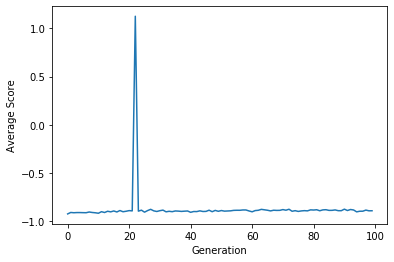

In [18]:
x = []
y = []
for i in range(num_gen):
    x.append(i)

for score in allScores:
    y.append(score[2])
plt.xlabel('Generation')
plt.ylabel('Average Score')
plt.plot(x, y)
plt.show()

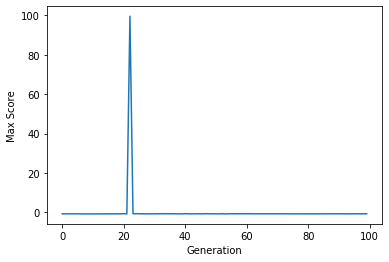

In [19]:
x = []
y = []
for i in range(num_gen):
    x.append(i)
    
for score in allScores:
    y.append(score[1])

# ticks = []
# for i in range(50):
#     ticks.append(i)
# plt.xticks(ticks)

plt.xlabel('Generation')
plt.ylabel('Max Score')
plt.plot(x, y)
plt.show()

## Diagnostics

In [20]:
# find all q values that correspond to given team
def find_team_q (q_table, team):
    result = []  
    for entry in q_table.q:
        if entry['team'] == str(team.id):
            result.append(entry)
    return result

# TODO better organize this for quicker analysis
def display_q (result):
    for entry in result:
        print(entry)

In [21]:
# run a given team after training
def post_training_run (env_name, team, epsilon, alpha, discount):
    env.reset()
    l_t, a_t = evaluate(team, env.current_state, epsilon)
    actions = []
    learners = []
    states = []
    #print(states)
    states.append(env.current_state)
    learners.append(l_t)
    actions.append(a_t)
    t = 0
    if env_name == 'fig9':
        t_max = 100
    else:
        t_max = 50
    total_reward = 0
    while t < t_max:
        s_next, reward, isDone = env.step(a_t)
        states.append(s_next)
        learners.append(l_t)
        actions.append(a_t)
        total_reward += reward
        if isDone:
            return states, actions, learners, total_reward
        l_next, a_next = evaluate(team, env.current_state, epsilon)
        #print('State: ' + str(s_next) + ' Action: ' + str(a_next))
        if l_t.id != l_next.id:
            #print('Switching Learners!')
            #print('Learner: ' + str(l_next.id))
            update(team, l_next, a_t, l_t, reward, alpha, epsilon)
        a_t = a_next
        l_t = l_next
        t = t + 1
    return states, actions, learners, total_reward

In [22]:
from tpg.agent import loadAgent
def load_champion(agent_path):
    agent = loadAgent(agent_path)
    agent.configFunctionsSelf()
    print(agent.team)
    return agent.team

In [23]:
champ = '41';
champ = load_champion('champions/'+champ+'.pk1')
#print(champ.q_table)
for q_value in champ.q_table:
    print(str(q_value['learner']) + ' ' + str(q_value['action']) + ' ' + str(q_value['q']))

print('\n\n\n')
for i in range(10):
    print('Run: ' + str(i) + ' -----')
    states, actions, learners, score = post_training_run(envName, champ, epsilon, alpha, discount)
    print(score)
    for j in range(len(states)):
        print(str(states[j]) + '  Action: ' + str(actions[j]) + ' Learner: ' + str(learners[j].id))
    print('\n\n')
#print(champ.q_table)
print('\n\n\n')
for q_value in champ.q_table:
    print(str(q_value['learner']) + ' ' + str(q_value['action']) + ' ' + str(q_value['q']))

8f359227-9b14-4c06-9dbb-fdf00b9bae05 3 0
8f359227-9b14-4c06-9dbb-fdf00b9bae05 2 0
648b3245-0925-4d21-85e6-052f52b3f3bd 2 0
648b3245-0925-4d21-85e6-052f52b3f3bd 1 0
648b3245-0925-4d21-85e6-052f52b3f3bd 2 0
50fbd9ac-c5bf-4119-a27b-cff3f2612477 0 0.019815144155773824
50fbd9ac-c5bf-4119-a27b-cff3f2612477 0 0.019815144155773824
ee2e32cc-6383-44f7-8f04-4ade2d4cfa18 1 0
ee2e32cc-6383-44f7-8f04-4ade2d4cfa18 0 0.0045000000000000005
bdd13107-f280-4b20-9c8b-8e4bdb961d76 0 -0.001
bdd13107-f280-4b20-9c8b-8e4bdb961d76 2 0.04484520178920323
bdd13107-f280-4b20-9c8b-8e4bdb961d76 2 0.04484520178920323
bdd13107-f280-4b20-9c8b-8e4bdb961d76 0 -0.001




Run: 0 -----
-0.6700000000000003
(4, 0)  Action: 0 Learner: 50fbd9ac-c5bf-4119-a27b-cff3f2612477
(3, 0)  Action: 0 Learner: 50fbd9ac-c5bf-4119-a27b-cff3f2612477
(3, 1)  Action: 2 Learner: bdd13107-f280-4b20-9c8b-8e4bdb961d76
(3, 1)  Action: 0 Learner: 50fbd9ac-c5bf-4119-a27b-cff3f2612477
(3, 1)  Action: 0 Learner: bdd13107-f280-4b20-9c8b-8e4bdb961d76
(3, 1)

In [24]:
%matplotlib notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


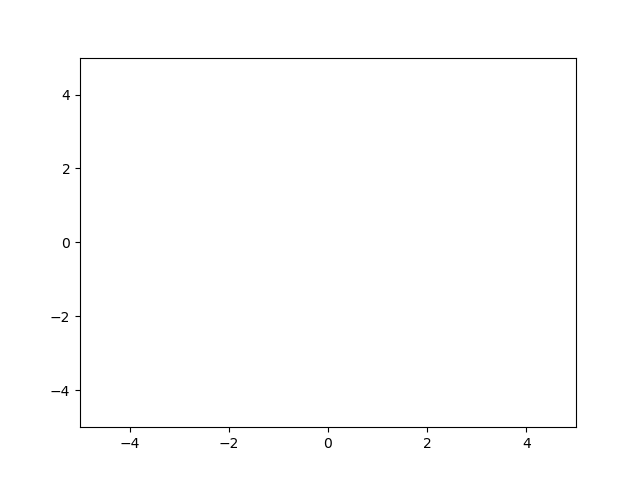

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
x = [0, 1, 2]
y = [0, 1, 2]

lines = plt.plot([], 'bo')
line = lines[0]

plt.xlim(-5, 5)
plt.ylim(-5, 5)

def animate(frame):
    #line.set_data((0, 1), (states[frame][1], states[frame][0]))
#     obs_x = [1]
#     obs_y = [1]
#     plt.plot(obs_x, obs_y, 'ro')
    # obstacles
    obs_x = [2, 1, 2, 1, 2, 3, 3]
    obs_y = [0, 1, 1, 3, 3, 3, 4]
    # win state
    win_x = [2]
    win_y = [4]
    # the animated trajectory
    #plt.cla()
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    traj_x = []
    traj_y = []
    for i in range(frame+1):
        traj_x.append(states[i][0])
        traj_y.append(states[i][1])
    # plot all of the points
    plt.plot(obs_x, obs_y, 'ro')
    plt.plot(win_x, win_y, 'go')
    plt.plot(traj_x, traj_y, 'b-')
    plt.plot(states[frame][0], states[frame][1], 'yo')
        
#anim = FuncAnimation(fig, animate, frames = len(states), interval = 1000)
#plt.grid(alpha=1)
#plt.show()